# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [13]:
df.drop(columns=['Unnamed: 0', 'index', 'mau'], inplace=True)

print(df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12466 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB
None 



In [15]:
print('Quantidade de linhas duplicadas:', df.duplicated().sum())

Quantidade de linhas duplicadas: 453


In [16]:
print('Quantidade total de linhas:', len(df), '\n')

print('Quantidade após remoção das linhas duplicadas:',
      len(df.drop_duplicates()), '\n')

df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)
df

Quantidade total de linhas: 15000 

Quantidade após remoção das linhas duplicadas: 14547 



,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14542,2016-03-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,3018.59
14543,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14544,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14545,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [21]:
colunas_numericas = df.select_dtypes(include=['float', 'bool'])

In [23]:
colunas_numericas.corr()

,posse_de_veiculo,posse_de_imovel,tempo_emprego,qt_pessoas_residencia,renda
posse_de_veiculo,1.000000,-0.014080,-0.086039,0.157866,0.061308
posse_de_imovel,-0.014080,1.000000,0.000084,-0.006123,0.029957
tempo_emprego,-0.086039,0.000084,1.000000,-0.064750,0.394918
qt_pessoas_residencia,0.157866,-0.006123,-0.064750,1.000000,0.020118
renda,0.061308,0.029957,0.394918,0.020118,1.000000


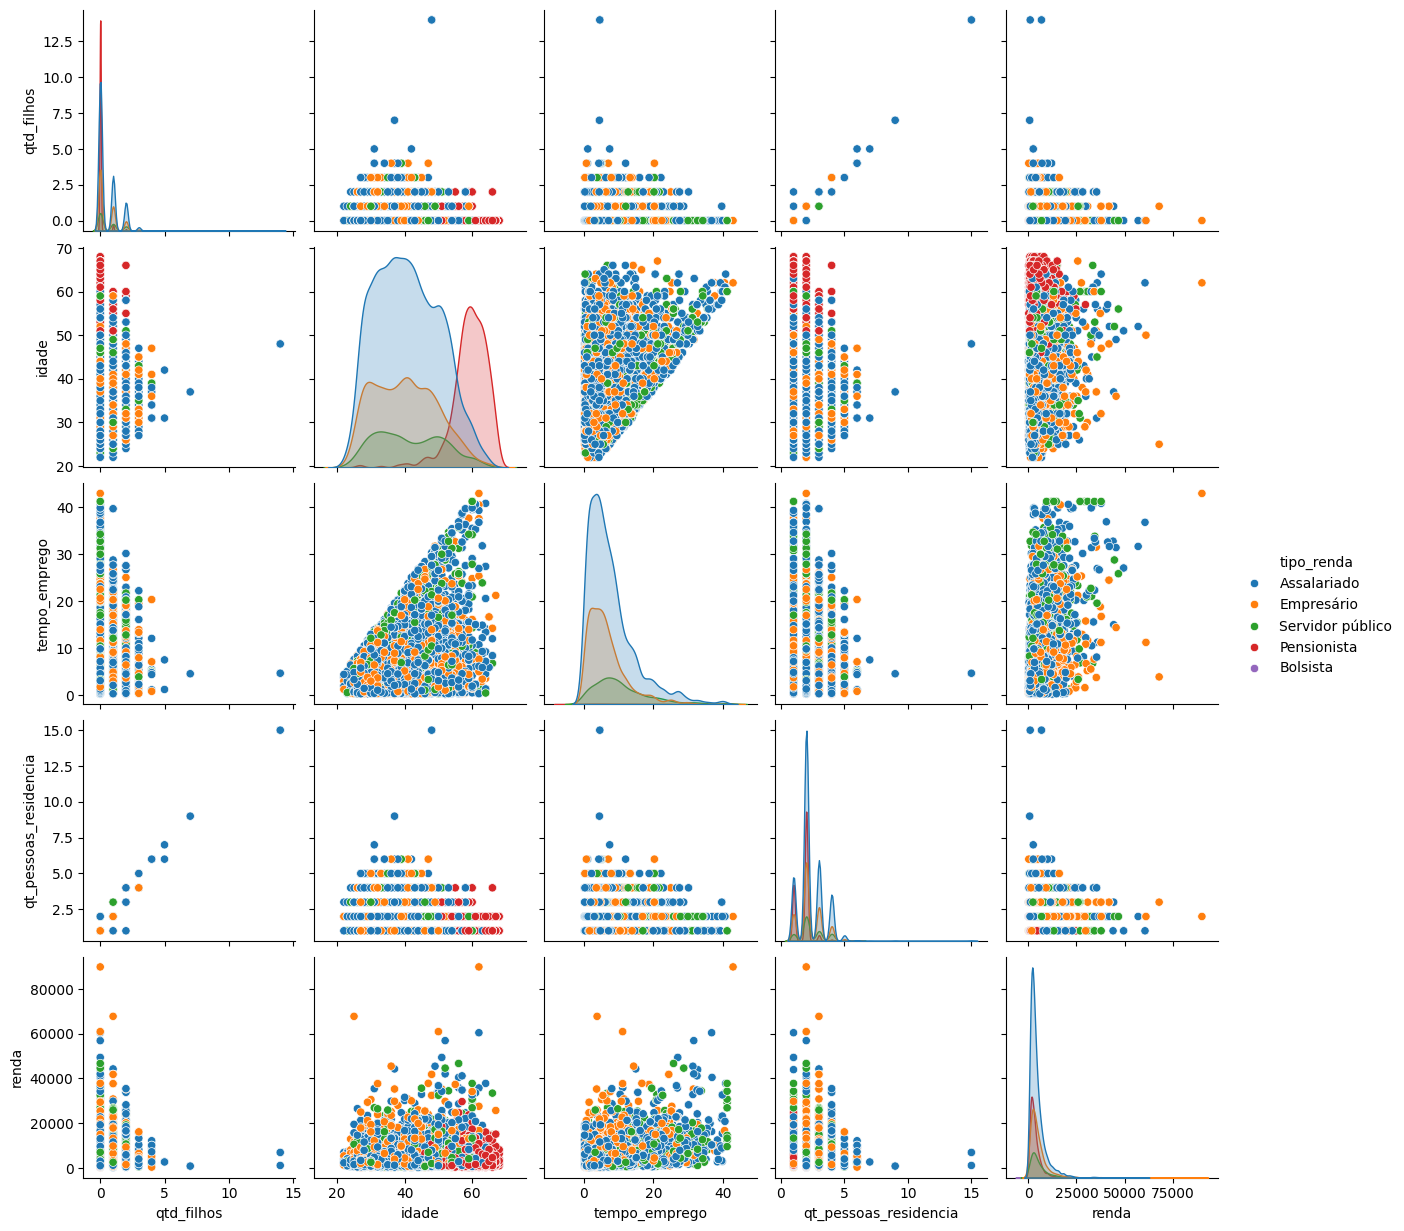

In [35]:
#Matriz de dispersão

sns.pairplot(data=df,
             hue='tipo_renda',
             vars=['qtd_filhos',
                   'idade',
                   'tempo_emprego',
                   'qt_pessoas_residencia',
                   'renda'])

plt.show()

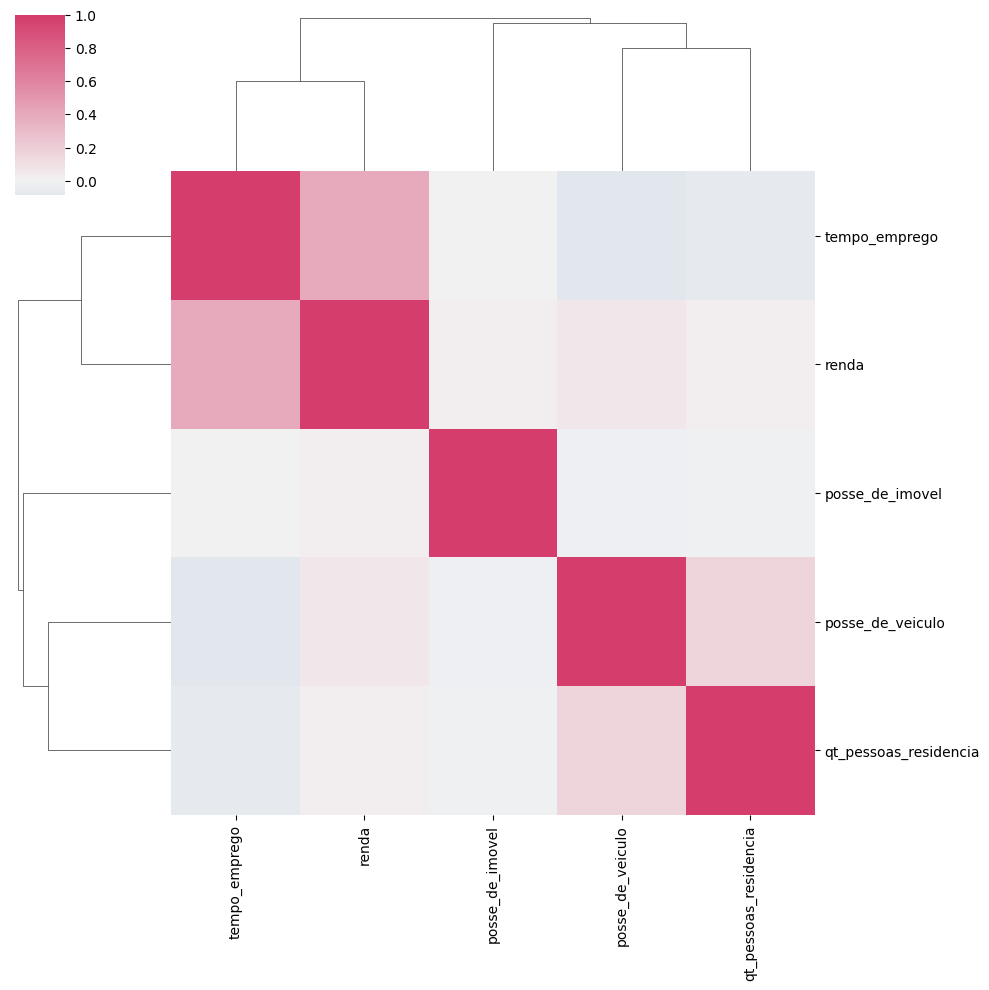

In [34]:
# Clustermap

cmap = sns.diverging_palette(h_neg=250,
                             h_pos=359,
                             as_cmap=True,
                             sep=1,
                             center = 'light')

sns.clustermap(data=colunas_numericas.corr(),
               figsize=(10, 10),
               center=0,
               cmap=cmap)

plt.show()

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

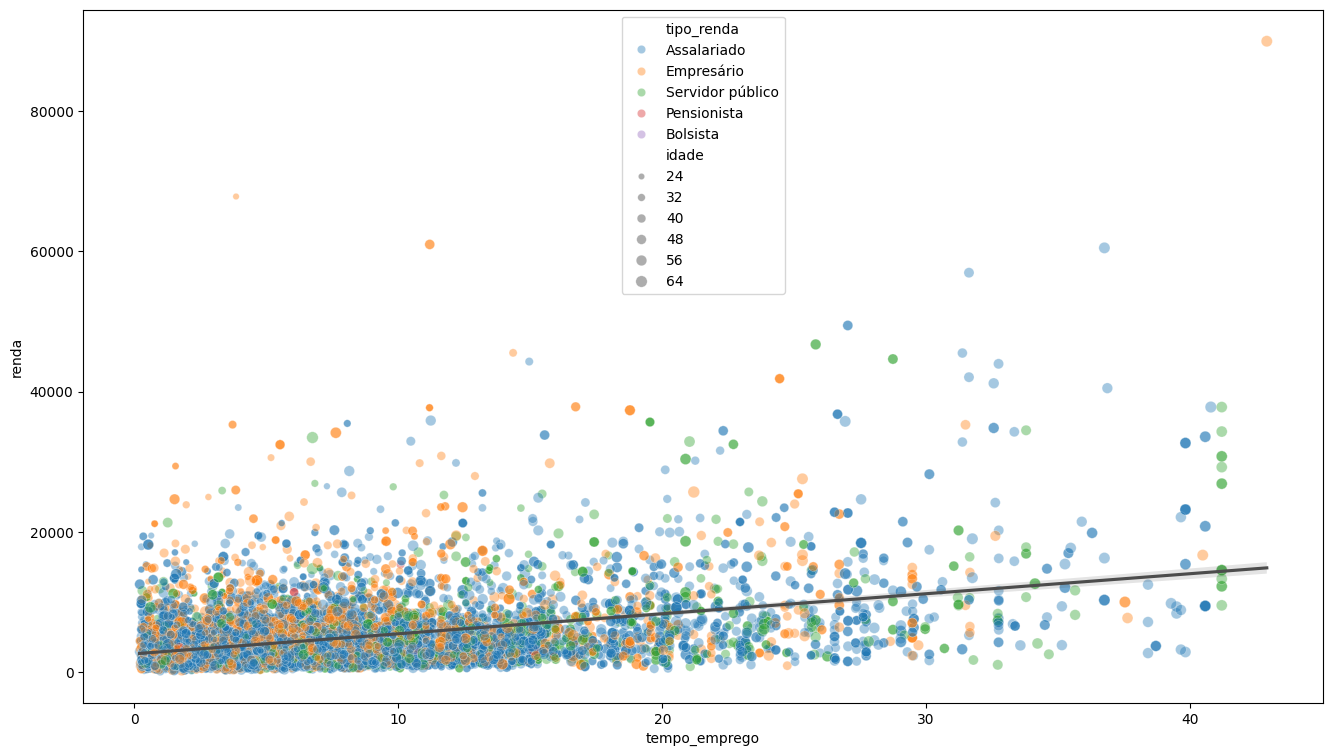

In [37]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='idade',  # <- 2ª
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', y='renda', data=df, scatter=False, color='.3')

plt.show()

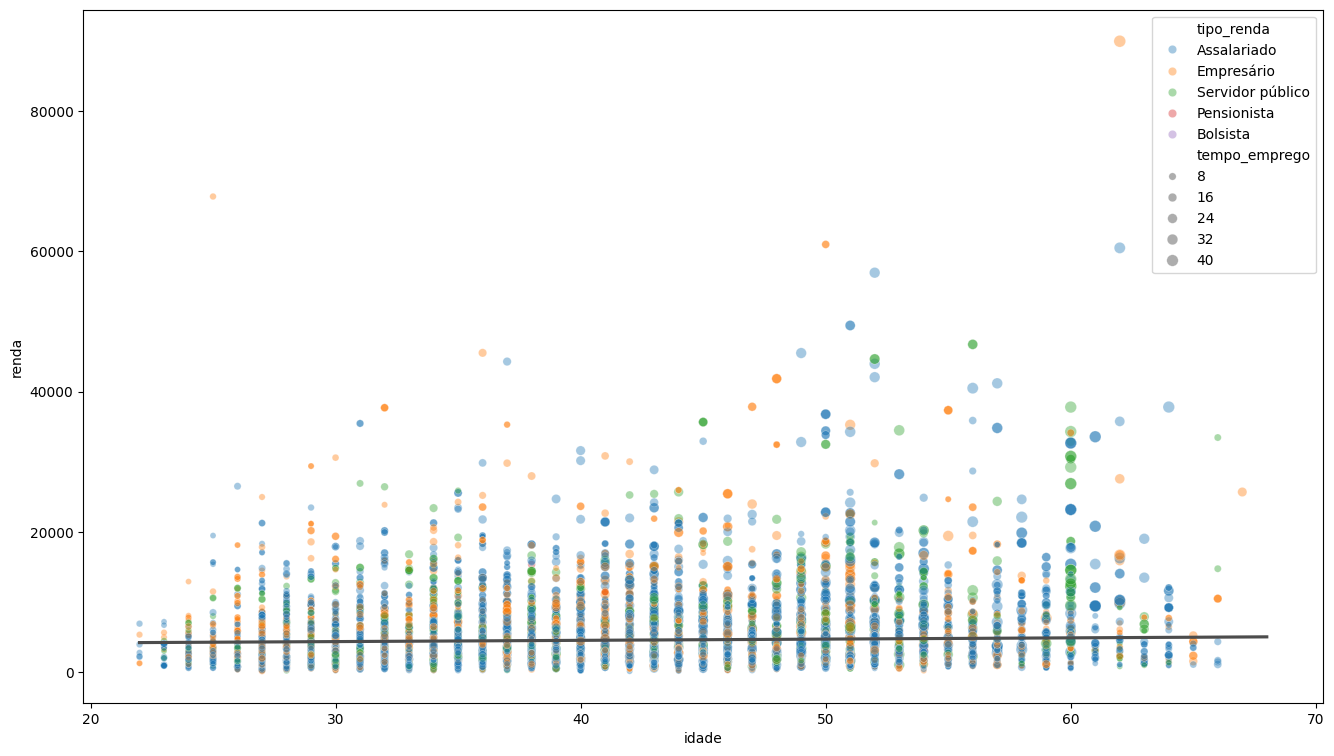

In [38]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='tempo_emprego',  # <- 2ª
                data=df,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', y='renda', data=df, scatter=False, color='.3')

plt.show()

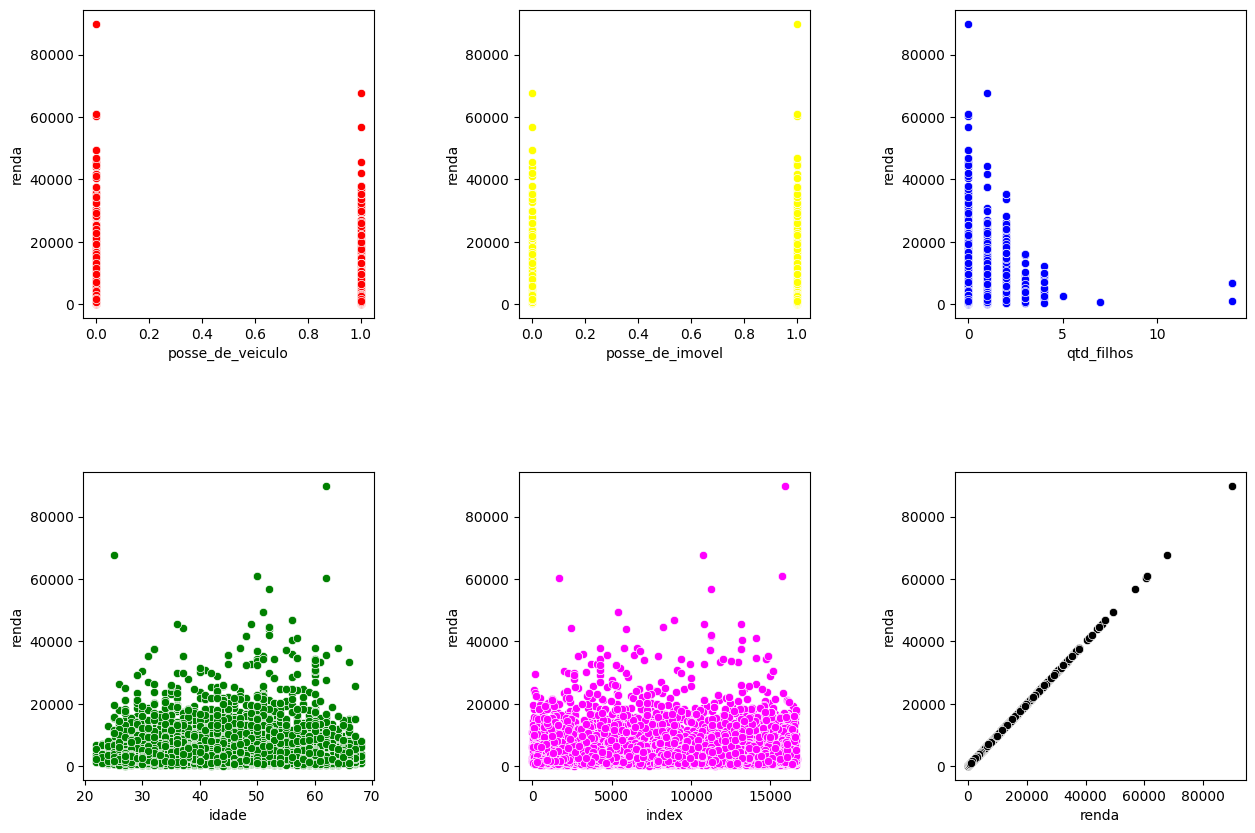

In [39]:
#interesse = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'index', 'renda']
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax = axes[0, 0],x=previsao_renda['posse_de_veiculo'], y=previsao_renda['renda'], color='red');
sns.scatterplot(ax = axes[0, 1],x=previsao_renda['posse_de_imovel'], y=previsao_renda['renda'], color='yellow');
sns.scatterplot(ax = axes[0, 2],x=previsao_renda['qtd_filhos'], y=previsao_renda['renda'], color='blue');
sns.scatterplot(ax = axes[1, 0],x=previsao_renda['idade'], y=previsao_renda['renda'], color='green');
sns.scatterplot(ax = axes[1, 1],x=previsao_renda['index'], y=previsao_renda['renda'], color='magenta');
sns.scatterplot(ax = axes[1, 2],x=previsao_renda['renda'], y=previsao_renda['renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

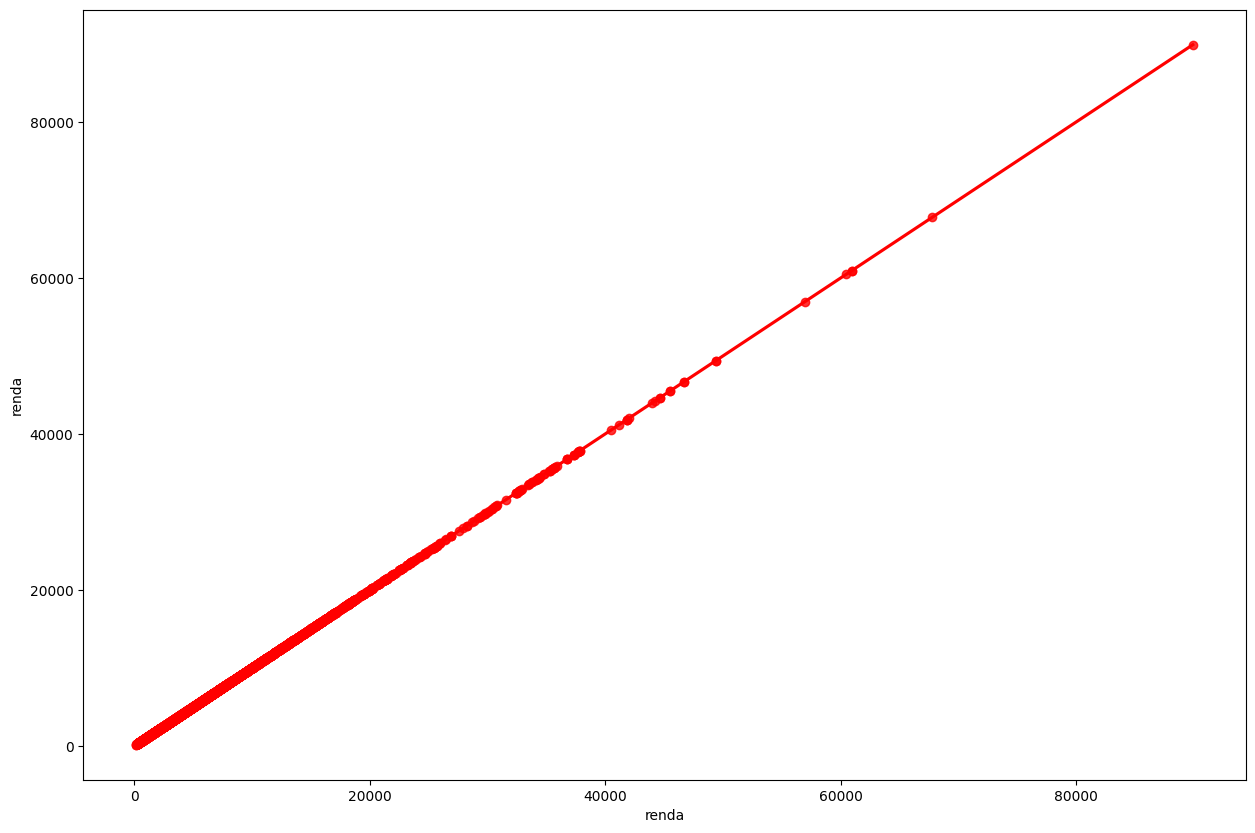

In [40]:
sns.regplot(x=df['renda'], y=df['renda'], color='red');

**Apesar da baixa correlação entre a variável tempo_de_e,mprego e a variável renda, a inclinação da linha de tendência revela uma covariância evidente. Em contraste, a variável idade, que obteve a segunda maior correlação, apresenta uma inclinação praticamente indetectável.**

3) Na su aopinião, há outliers na variável renda?

O rendimento esta alinhado, mas alguns valores estao acima da média.

Conforme já mencionado, outliers estão presentes na variável **renda** de clientes com renda empresarial. No entanto, devido à baixa frequência desses outliers, seu impacto nos resultados da análise de tendências provavelmente será insignificante.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

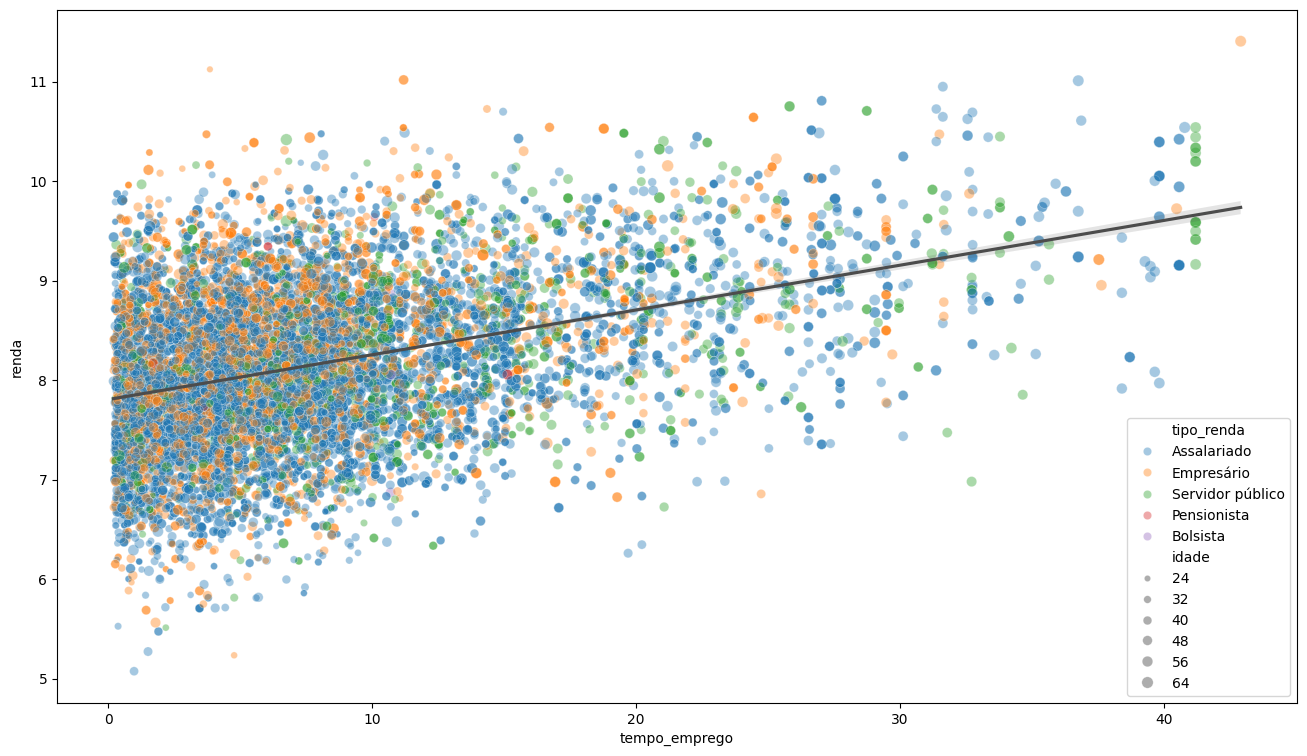

In [43]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='idade',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego',
            y='renda',
            data=df_log,
            scatter=False,
            color='.3')

plt.show()

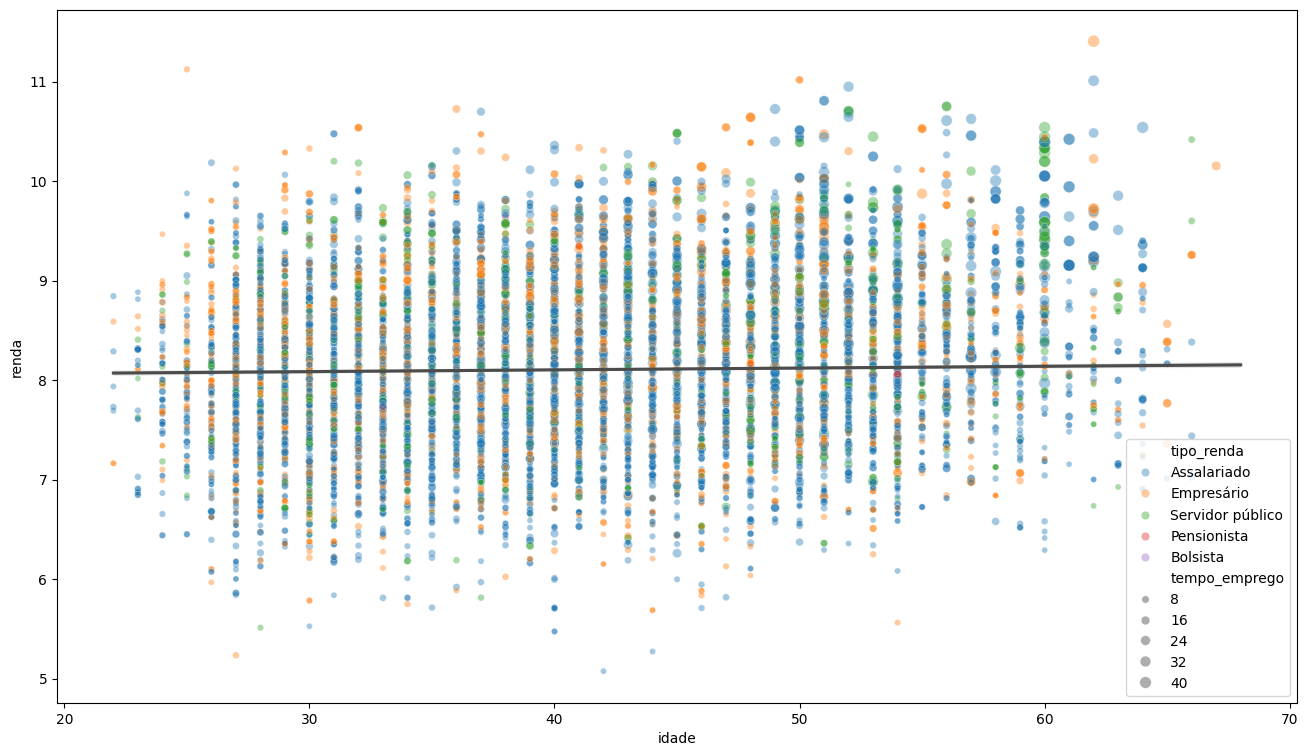

In [44]:
df_log = df.copy()
df_log['renda'] = np.log(df_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda',
                hue='tipo_renda',
                size='tempo_emprego',  # <- 2ª
                data=df_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade',
            y='renda',
            data=df_log,
            scatter=False,
            color='.3')

plt.show()

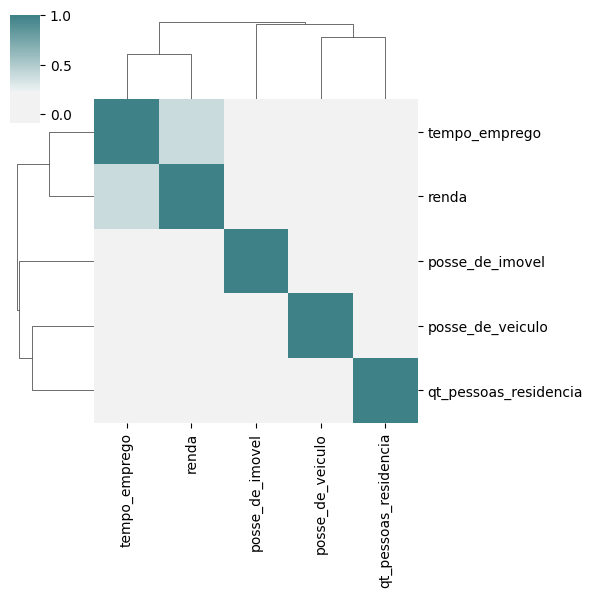

In [46]:
cmap = sns.diverging_palette(h_neg=100, h_pos=200, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(colunas_numericas.corr(), figsize=(6, 6), center = 0, cmap=cmap);

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [52]:
# Diferença após aplicação do LOG:

pd.concat(objs=[colunas_numericas.corr().tail(1),
                colunas_numericas.corr().tail(1)],
          axis=0
         ).reset_index(drop=True).rename(index={0:'renda',
                                                1:'renda_log'})

,posse_de_veiculo,posse_de_imovel,tempo_emprego,qt_pessoas_residencia,renda
renda,0.061308,0.029957,0.394918,0.020118,1.0
renda_log,0.061308,0.029957,0.394918,0.020118,1.0


**A aplicação do LOG fez com que alterasse a correlação entre as variáveis**, mas visualmente, a análise melhorou principalmente na correlação entre renda e tempo_emprego, pois reduziu a dispersão dos pontos e os concentrou, facilitando a compreensão da linha de tendência que aparentemente apresenta uma maior inclinação.